# MLP Implementation
### A code that implements MLP with single hidden layer
By Isu Kim @ https://github.com/isu-kim

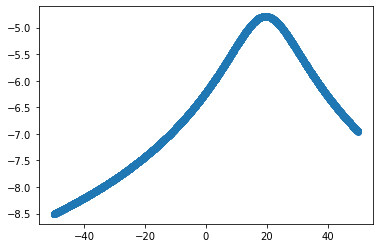

In [51]:
import pandas as pd
df = pd.read_csv("hw3_data.csv")

import matplotlib.pyplot as plt
plt.scatter(df.x, df.y)

In [52]:
import random


def train_validate_split(x, y, train_percentage):
    """
    A function that splits train data and validate data with given ratio
    
    @param x: The list of x.
    @param y: The list of y.
    @param train_percentage: The total train data's percentage. 0.8 for 80%
    @return: tuple in train_x, train_y, validate_x, validate_y
    """
    all_data = [i for i in range(len(x))]
    selected = list()
    for i in range(int(train_percentage * len(x))):
        choice = random.choice(all_data)
        selected.append(choice)
        all_data.remove(choice)
    
    print("Total Train : " + str(len(selected)) + " / Total Validation : " + str(len(all_data)))
    
    train_x = [x[i] for i in selected]
    train_y = [y[i] for i in selected]
    validate_x = [x[i] for i in all_data]
    validate_y = [y[i] for i in all_data]
    
    return train_x, train_y, validate_x, validate_y

In [53]:
# Set data values
x = list(df.x)
y = list(df.y)

In [54]:
train_x, train_y, validate_x, validate_y = train_validate_split(x, y, 0.8)

Total Train : 4000 / Total Validation : 1000


In [55]:
w = [1,1,1,1]

In [56]:
import numpy as np
def sigmoid(x):
    """
    A function that calculates sigmoid function.
    @param x: The value to calculate sigmoid.
    @returns: Calculated sigmoid.
    """
    return 1 / (1 + np.exp(-x))

In [57]:
def sigmoid_prime(x):
    """ 
    A function that calculates derivative of sigmoid function.
    @param x: The value to calculate derivative of sigmoid.
    @returns: Calculated value
    """
    return sigmoid(x) * (1 - sigmoid(x))

In [58]:
def predict(x):
    """
    A function that calculates predicted value of model.
    @param x: The value to predict.
    @returns: Predicted value according to the model.
    """
    tmp = w[0] + w[1] * x
    h = sigmoid(tmp)
    result = w[2] + w[3] * h
    return result

In [40]:
def cost():
    """
    A function that calculates cost function using MSE.
    This will automatically calculate cost
    @returns: MSE cost value.
    """
    tmp = 0
    for i in range(len(validate_x)):
        tmp += (predict(validate_x[i]) - validate_y[i]) ** 2
    return tmp / 2

In [72]:
def fit(alpha, epoch):
    """
    A function that fits model using GD and backpropagation.
    This will automatically retrieve all weights.
    @param alpha: The learning rate value.
    @param epoch: Total epoch count.
    """
    global w
    print("=" * 20)
    print("Alpha: " + str(alpha))
    print("Epoch: " + str(epoch))
    print("=" * 20)
    for j in range(epoch):
        for i in range(len(train_x)):
            y_hat = predict(train_x[i])
            z = w[0] + w[1] * train_x[i]
            tmp = [0, 0, 0, 0]
            tmp[0] = w[0] - alpha * (y_hat - train_y[i]) * w[3] * 1 * sigmoid_prime(z)
            tmp[1] = w[1] - alpha * (y_hat - train_y[i]) * w[3] * train_x[i] * sigmoid_prime(z)
            tmp[2] = w[2] - alpha * (y_hat - train_y[i]) 
            tmp[3] = w[3] - alpha * (y_hat - train_y[i]) * z 
            w = tmp
        print("Epoch " + str(j) + " / Validation Loss = " + str(cost()))

In [73]:
fit(0.01, 10)

Alpha: 0.01
Epoch: 10
Epoch 0 / Validation Loss = 1.075299756237752e+02
Epoch 1 / Validation Loss = 1.0512681424065983e+02
Epoch 2 / Validation Loss = 1.0489210146177919e+02
Epoch 3 / Validation Loss = 1.0488116208723498e+02
Epoch 4 / Validation Loss = 1.0489046269625324e+02
Epoch 5 / Validation Loss = 1.0489702630002824e+02
Epoch 6 / Validation Loss = 1.0490037456175182e+02
Epoch 7 / Validation Loss = 1.0490193633776822e+02
Epoch 8 / Validation Loss = 1.0490264099492357e+02
Epoch 9 / Validation Loss = 1.0490295461857167e+02


In [74]:
w

[-1.778770819375766,
 -0.16241236287347544,
 -5.654484046435798,
 -2.4095863653231917]

In [75]:
predicted = list()
for i in x:
    predicted.append(predict(i))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


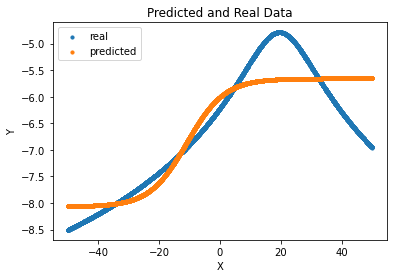

In [76]:
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('single_layer.eps')

In [77]:
cost()

1.0490295461857167e+02